In [466]:
from useful_scit.imps import *

sns.set(style="darkgrid")

## bc

## data

In [467]:
fold = './data/MAAP/'

In [468]:
files = glob.glob(fold + '*.nas')

In [469]:
file_data_frame = pd.DataFrame(files, columns=['path'])
file_data_frame = file_data_frame.sort_values('path')
file_data_frame['year'] = file_data_frame.path.str.extract(r'\.(20\d\d)').astype(int)

In [470]:
def get_date_from(day, year):
    d1 = pd.to_datetime(dt.date(year, 1, 1))
    dT = pd.Timedelta(day, unit='D')
    return d1 + dT

In [471]:
def read_maap(row):
    df = pd.read_csv(
        row.path,
        sep='\s+',
        skiprows=75
    )
    df['date'] = df.apply(lambda rr: get_date_from(rr.start_time, row.year), axis=1)
    df = df.set_index('date')
    return df

In [472]:
file_data_frame['df'] = file_data_frame.apply(lambda r: read_maap(r), axis=1)

In [473]:
joined_data_frame = pd.concat(list(file_data_frame['df']))

/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [474]:
joined_data_frame.describe()

,T_int,abs670,abs670pc16,abs670pc84,ed_y,end_time,numflag,p_int,st_y,start_time
count,578208.000000,578208.000000,52608.000000,52608.000000,525600.0,578208.000000,578208.000000,578208.000000,525600.0,578208.000000
mean,1588.578680,20180.835463,203961.952288,203962.921869,2018.0,182.517403,0.136203,1808.174099,2018.0,182.512981
std,3312.954284,134879.430461,402944.143790,402943.653005,0.0,105.375336,0.337973,3223.803625,0.0,105.375330
min,10.990000,-1.980000,-1.518000,-0.000000,2018.0,0.000694,0.000000,533.370000,2018.0,0.000000
25%,291.210000,0.330000,0.066000,0.858000,2018.0,91.258854,0.000000,538.750000,2018.0,91.253993
50%,294.860000,1.056000,0.528000,1.650000,2018.0,182.517014,0.000000,539.890000,2018.0,182.512153
75%,300.060000,2.838000,2.772000,5.412000,2018.0,273.775173,0.000000,541.050000,2018.0,273.770313
max,9999.990000,999999.999999,999999.999999,999999.999999,2018.0,366.000000,0.999000,9999.990000,2018.0,365.958333


In [475]:
joine_data_frame_1 = joined_data_frame[joined_data_frame.abs670 < 9999]

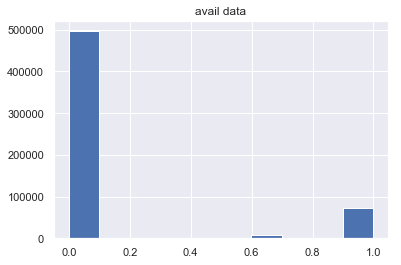

In [476]:
%matplotlib inline
joined_data_frame.numflag.hist()
ax = plt.gca()
ax.set_title('avail data');

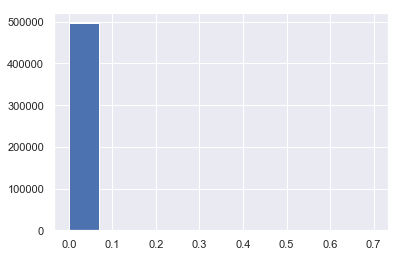

In [477]:
joine_data_frame_1.numflag.hist()

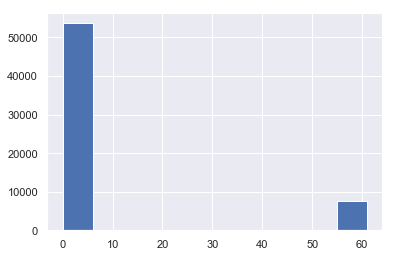

In [478]:
joine_data_frame_1.resample('H').count().iloc[:, 1].hist()

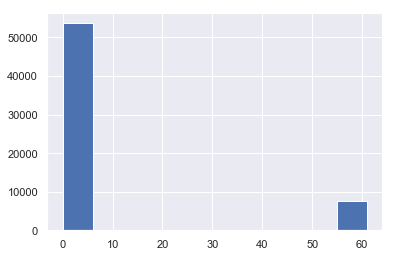

In [479]:
j1 = joine_data_frame_1.shift(1, freq=pd.Timedelta(5, 'm')).resample('H')
j1.count().iloc[:, 1].hist()

In [535]:
j2 = j1.mean()
j2[:2]

,T_int,abs670,abs670pc16,abs670pc84,ed_y,end_time,numflag,p_int,st_y,start_time
date,,,,,,,,,,
2012-01-01 00:00:00,9999.99,4.219440,3.165994,5.287920,NaN,0.041667,0.0,539.04,NaN,0.000000
2012-01-01 01:00:00,9999.99,3.123862,1.387294,4.946205,NaN,0.083333,0.0,539.21,NaN,0.041667


In [1094]:
j2['month'] = j2.index.month
j2['hour'] = j2.index.hour
j2['year'] = j2.index.year
j2['day'] = j2.index.date
j2['abs670_log']=np.log10(j2.abs670)

/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


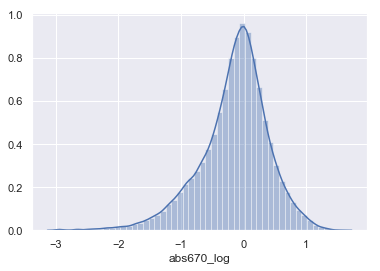

In [1099]:
sns.distplot(j2.abs670_log[j2.abs670_log>-3].dropna())

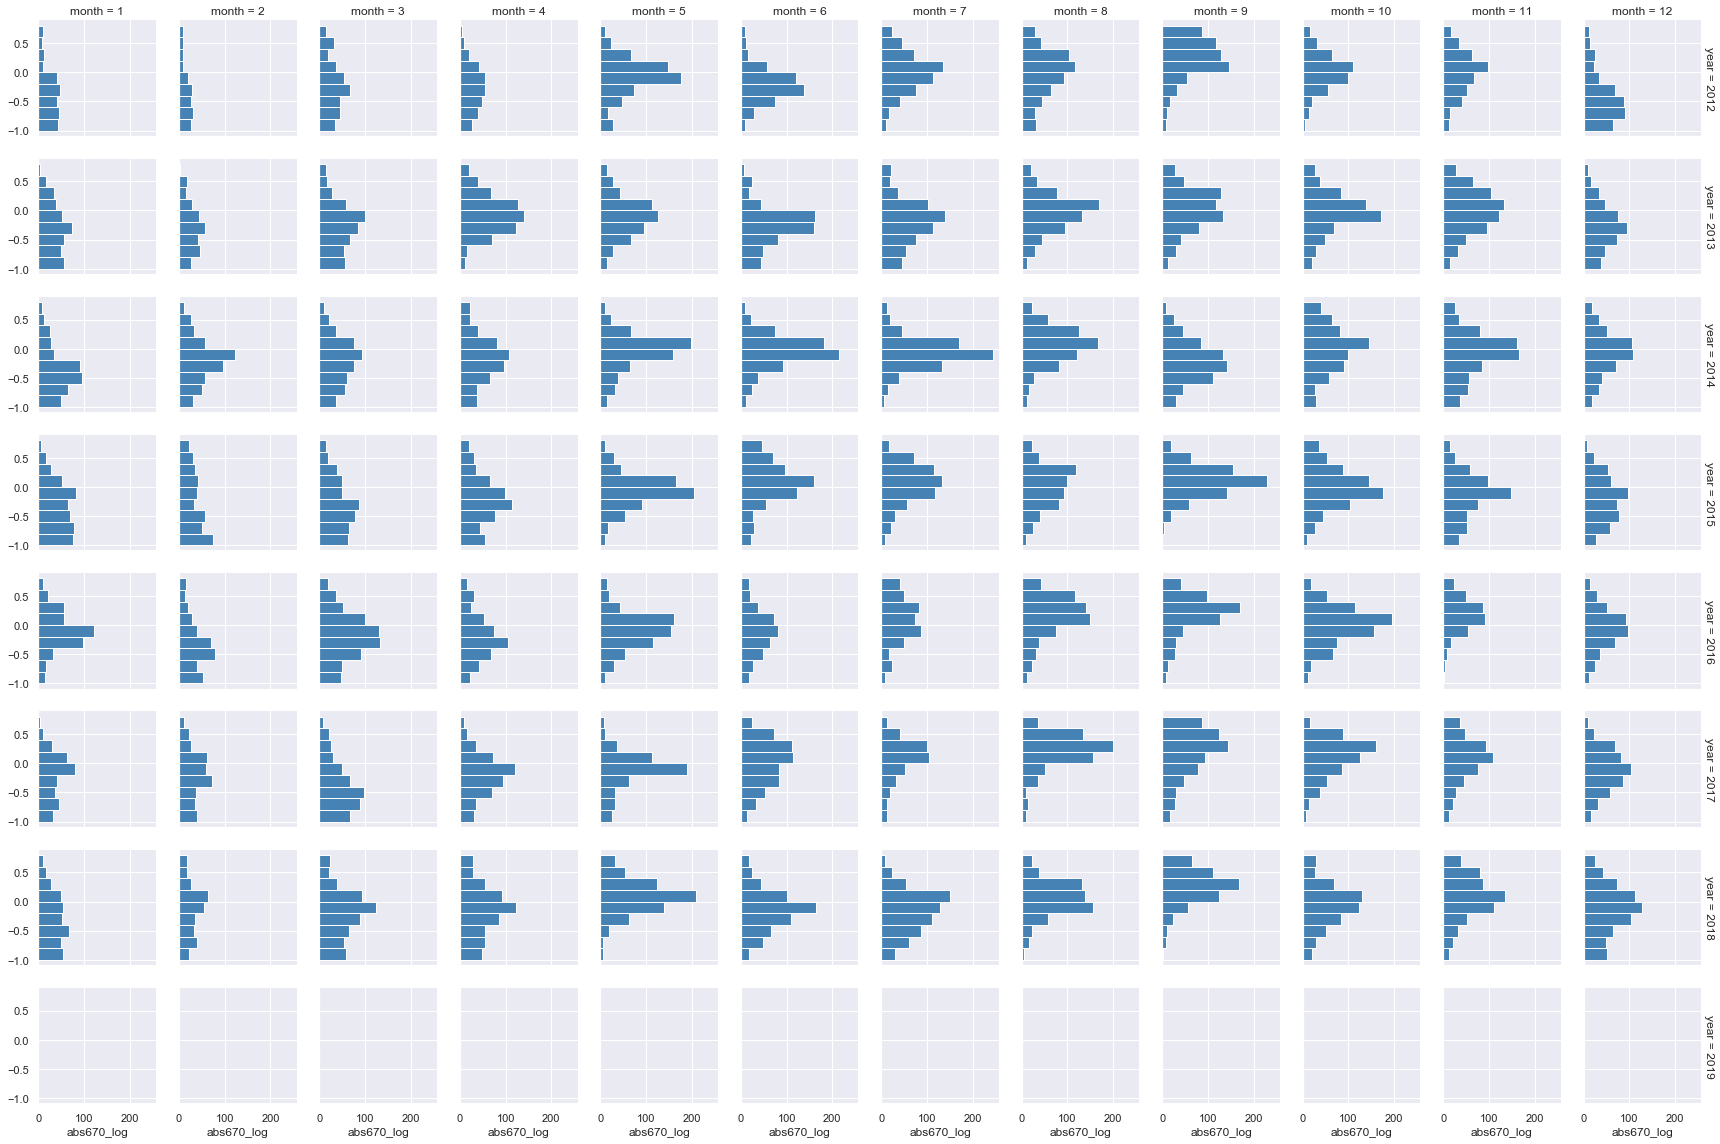

In [1093]:
g = sns.FacetGrid(j2, row="year", col="month", margin_titles=True,height=2,aspect=1)
bins = np.arange(-1, 1, .2)
gmap = g.map(plt.hist, "abs670_log", color="steelblue", bins=bins,orientation='horizontal')
# axs = gmap.axes
# axl = np.ndarray.flatten(axs)
# for ax in axl:
#     ax.set_yscale('log')

(0, 6)

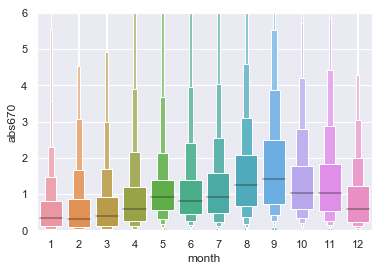

In [537]:
%matplotlib inline
ax = sns.boxenplot(x='month', y='abs670', data=j2)
ax.set_ylim(0, 6)

(0, 2.5)

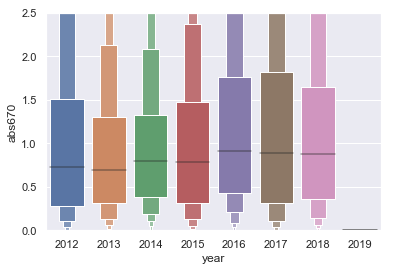

In [538]:
%matplotlib inline
ax = sns.boxenplot(x='year', y='abs670', data=j2)
ax.set_ylim(0, 2.5)

(0, 2.5)

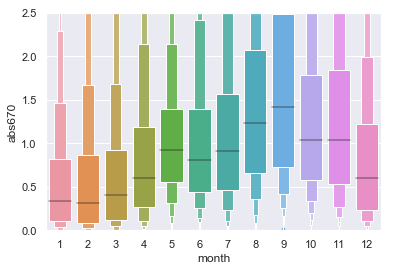

In [539]:
%matplotlib inline
ax = sns.boxenplot(x='month', y='abs670', data=j2)
ax.set_ylim(0, 2.5)

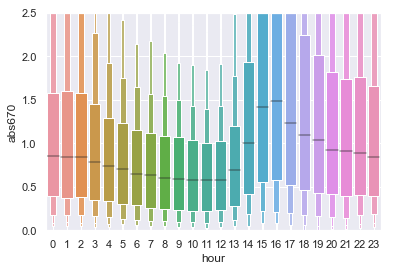

In [540]:
%matplotlib inline
ax = sns.boxenplot(x='hour', y='abs670', data=j2)
ax.set_ylim(0, 2.5);

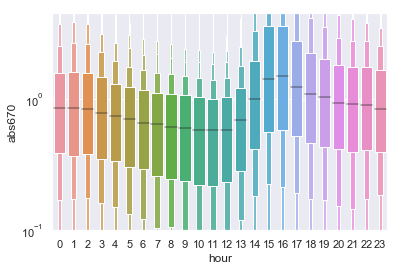

In [541]:
%matplotlib inline
ax = sns.boxenplot(x='hour', y='abs670', data=j2)
ax.set_ylim(.1, 4.5);
ax.set_yscale('log')

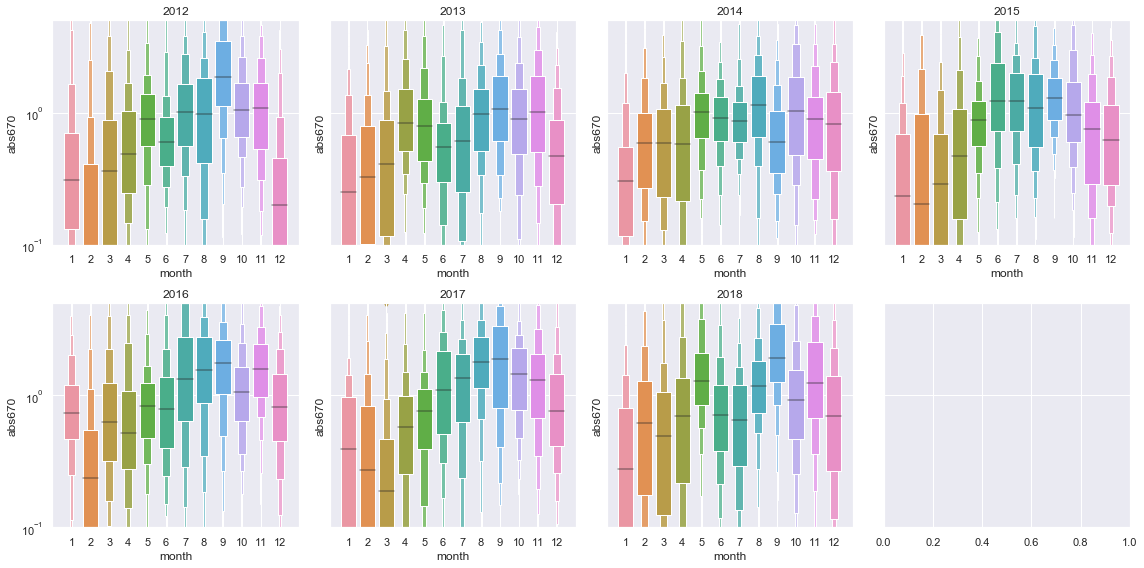

In [542]:
%matplotlib inline
# %matplotlib widget
fig, axs = plt.subplots(2, 4, sharey=True, sharex=False, figsize=(16, 8))
axs = np.ndarray.flatten(axs)
ys = [2012, 2013, 2014, 2015, 2016, 2017, 2018]
for i, year in enumerate(ys):
    ax = axs[i]
    ax = sns.boxenplot(x='month', y='abs670', data=j2[j2.year == year], ax=ax,
                       #                      color = 'grey'
                       )
    ax.set_ylim(.1, 5);
    ax.set_xlim(-1, 12);
    ax.set_yscale('log')
    ax.set_title(year)
fig.tight_layout()

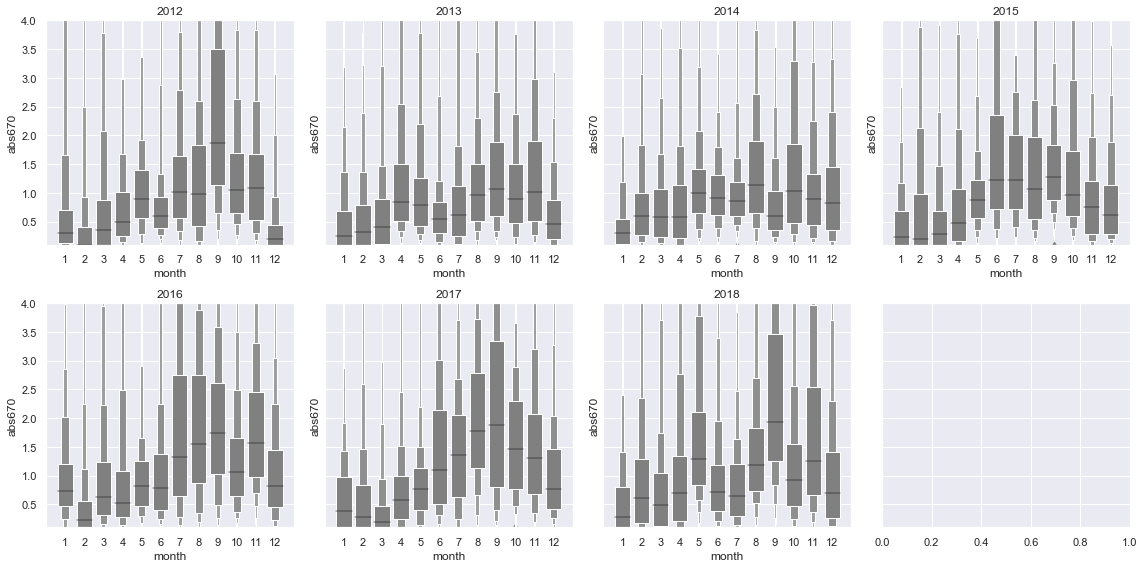

In [543]:
%matplotlib inline
fig, axs = plt.subplots(2, 4, sharey=True, sharex=False, figsize=(16, 8))
axs = np.ndarray.flatten(axs)
ys = [2012, 2013, 2014, 2015, 2016, 2017, 2018]
for i, year in enumerate(ys):
    ax = axs[i]
    ax = sns.boxenplot(x='month', y='abs670', data=j2[j2.year == year], ax=ax, color='grey')
    ax.set_ylim(.1, 4);
    ax.set_xlim(-1, 12);
    ax.set_yscale('linear')
    ax.set_title(year)
fig.tight_layout()

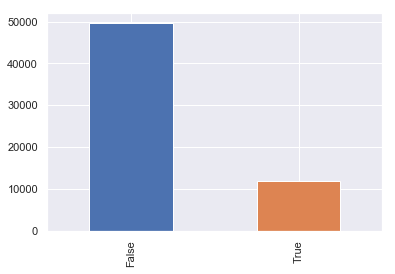

In [548]:

isna = j2.abs670.isna()
isna.value_counts().plot.bar()

In [549]:
n3 = len(j2)
l = []
for i in range(1, 2 * 24):
    j3 = j2.abs670.interpolate(limit=i)
    isna = j3.isna()
    ll = isna.value_counts()
    l.append([i, ll[False] / n3])

<BarContainer object of 47 artists>

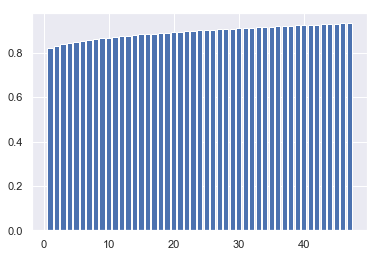

In [550]:
plt.bar(*np.array(l).T)

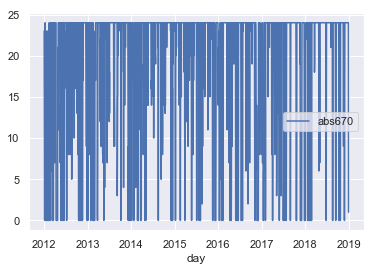

In [551]:
j2[['abs670', 'day']].groupby('day').count().plot()

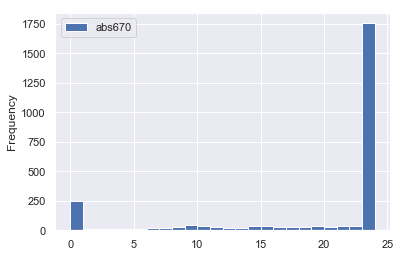

In [552]:
j2[['abs670', 'day']].groupby('day').count().plot.hist(bins=range(25))

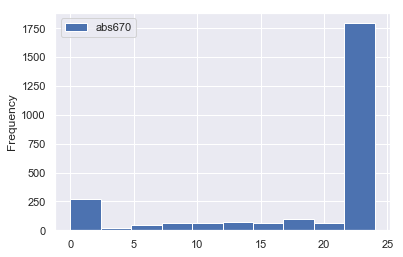

In [553]:
j2[['abs670', 'day']].groupby('day').count().plot.hist()

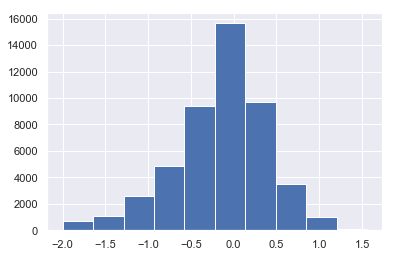

In [584]:
j2['abs670_filt']=j2.abs670
j2.loc[(
    (j2.abs670<=0.01) &
    (j2.abs670>=0.00)
),'abs670_filt']=0.01
j2.loc[j2.abs670<0,'abs670_filt']=np.nan
j2['abs670_log']=np.log10(j2.abs670_filt)


j2.abs670_log.hist()

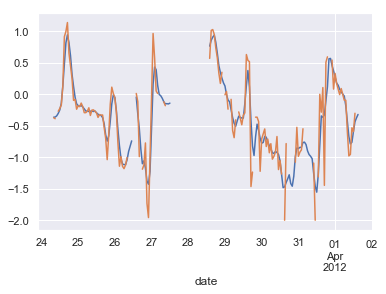

In [617]:
j2['abs670_log_g']=j2.abs670_log.interpolate(limit=2)
j2['abs670_log_g']=j2['abs670_log_g'].rolling(4,min_periods=2,center=True,win_type='gaussian').mean(std=2)
j2.abs670_log_g[2000:2200].plot()
j2.abs670_log[2000:2200].plot()

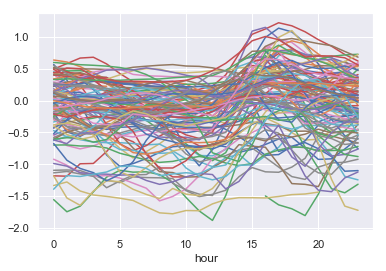

In [646]:
jgbd = j2.groupby('day')
pdfs = [df for i,df in jgbd]
for d in pdfs[::20]:
    d1 = d.set_index('hour')
    d1.abs670_log_g.plot()

In [1103]:
j22 = j2.shift(12, 'H')
j22['day'] = j22.index.date
j22['pos'] = j22.index.hour
j22 = j22.shift(-12, 'H')
j22['d'] = j22.index.day

jd = j22[['abs670_log_g', 'day']].groupby('day').count().reset_index()
jd['n'] = jd['abs670_log_g']
j22 = j22.reset_index()
j22 = j22.set_index('day')
# j22['day']=pd.to_datetime(j2.day)
# jd['day']=pd.to_datetime(jd.day)
jd = jd.set_index('day')
jj = jd[['n']].join(j22, how='outer')
jj = jj.reset_index()
jj['year'] = jj['year'].astype(int)
jj['month'] = jj['month'].astype(int)
jj['hour'] = jj['hour'].astype(int)

# jj = jj.set_index(['year','month','d','hour'])[['n','abs670','day']]
jj = jj.set_index(['day', 'pos'])[['year', 'month', 'd', 'n', 'abs670_log_g', 'hour']]

In [1121]:
j_clean = j22.reset_index()
j_clean['datetime']=j_clean['date']
j_clean['date_pos']=j_clean['day']
j_clean = j_clean.set_index('datetime')
j_clean['date']=j_clean.index.date
j_clean['day']=j_clean['d']
j_clean = j_clean.drop(
    [
        'd','T_int','ed_y','abs670pc16','abs670pc84','p_int','st_y',
        'end_time','numflag','start_time'
    ],
    axis=1
)

j_clean.sample()

,day,date,abs670,month,hour,year,abs670_filt,abs670_log,abs670_log_g,pos,date_pos
datetime,,,,,,,,,,,
2014-02-15 19:00:00,15,2014-02-15,1.122,2,19,2014,1.122,0.049993,0.404845,7,2014-02-16


In [1109]:
j_clean.sample()

,day,date,T_int,abs670,abs670pc16,abs670pc84,ed_y,end_time,numflag,p_int,...,start_time,month,hour,year,abs670_filt,abs670_log,abs670_log_g,pos,d,datetime
47537,3,2017-06-04,308.68,0.611368,0.132,1.188,NaN,153.75,0.0,541.19,...,153.708333,6,17,2017,0.611368,-0.213697,-0.127076,5,3,2017-06-03 17:00:00


In [651]:
ds = xr.Dataset.from_dataframe(jj)

In [652]:
ds

<xarray.Dataset>
Dimensions:       (day: 2558, pos: 24)
Coordinates:
  * day           (day) datetime64[ns] 2012-01-01 2012-01-02 ... 2019-01-01
  * pos           (pos) int64 0 1 2 3 4 5 6 7 8 9 ... 15 16 17 18 19 20 21 22 23
Data variables:
    year          (day, pos) float64 nan nan nan nan nan ... nan nan nan nan nan
    month         (day, pos) float64 nan nan nan nan nan ... nan nan nan nan nan
    d             (day, pos) float64 nan nan nan nan nan ... nan nan nan nan nan
    n             (day, pos) float64 nan nan nan nan nan ... nan nan nan nan nan
    abs670_log_g  (day, pos) float64 nan nan nan nan nan ... nan nan nan nan nan
    hour          (day, pos) float64 nan nan nan nan nan ... nan nan nan nan nan

In [653]:
ds1 = ds.dropna('day')
ds1

<xarray.Dataset>
Dimensions:       (day: 1813, pos: 24)
Coordinates:
  * day           (day) datetime64[ns] 2012-01-02 2012-01-08 ... 2018-12-31
  * pos           (pos) int64 0 1 2 3 4 5 6 7 8 9 ... 15 16 17 18 19 20 21 22 23
Data variables:
    year          (day, pos) float64 2.012e+03 2.012e+03 ... 2.018e+03 2.018e+03
    month         (day, pos) float64 1.0 1.0 1.0 1.0 1.0 ... 12.0 12.0 12.0 12.0
    d             (day, pos) float64 1.0 1.0 1.0 1.0 1.0 ... 31.0 31.0 31.0 31.0
    n             (day, pos) float64 24.0 24.0 24.0 24.0 ... 24.0 24.0 24.0 24.0
    abs670_log_g  (day, pos) float64 -0.687 -0.7263 -0.8127 ... -0.9134 -0.8237
    hour          (day, pos) float64 12.0 13.0 14.0 15.0 ... 8.0 9.0 10.0 11.0

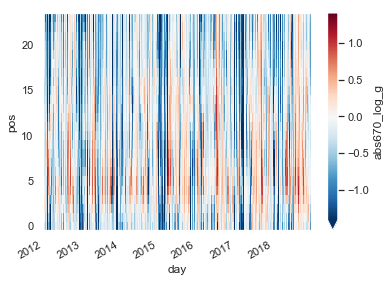

In [654]:
ds1.isel(day=slice(0, -1))['abs670_log_g'].plot(x='day', robust=True)

###### Let try to normalize the vectors 

In [518]:
from sklearn.preprocessing import normalize

In [863]:
ds1['abs_norm_log'] = (['day', 'pos'], normalize(ds1.abs670_log_g))

(-0.25, 0.5)

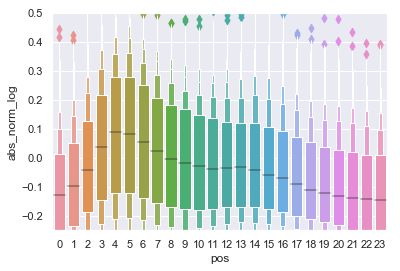

In [864]:
sns.boxenplot(
    x='pos',
    y='abs_norm_log',
    data=ds1['abs_norm_log'].to_dataframe().reset_index()
)
ax = plt.gca()
ax.set_ylim(-.25, .5)

(-1, 1)

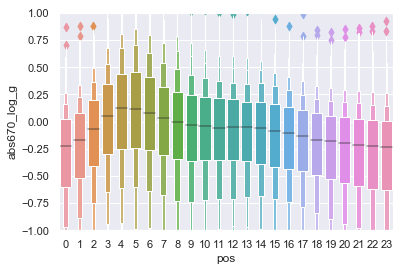

In [865]:
sns.boxenplot(
    x='pos',
    y='abs670_log_g',
    data=ds1['abs670_log_g'].to_dataframe().reset_index()
)
ax = plt.gca()
ax.set_ylim(-1, 1)

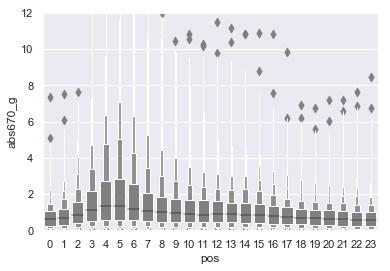

In [870]:
ds1['abs670_g']=10**ds1['abs670_log_g']
ds1['abs_norm_g'] = (['day', 'pos'], normalize(ds1.abs670_g))
sns.boxenplot(
    x='pos',
    y='abs670_g',
    data=ds1['abs670_g'].to_dataframe().reset_index(),
    color = 'grey'
)
ax = plt.gca()
ax.set_ylim(0, 12);

In [875]:
# ds1['abs_norm1']=(['day','pos'],normalize(ds1.sel(pos=3).abs670))
# tot = np.sum(normalize(ds1.abs_norm.sel(pos=slice(3,200))),axis=1)
tot = np.linalg.norm(ds1.abs670_log_g.sel(pos=slice(4, 200)), axis=1)
ds1['tot_norm_4_log'] = ('day', tot)
ds1['abs_norm_4_log'] = ds1.abs670_log_g / ds1.tot_norm_4_log

tot = np.linalg.norm(ds1.abs670_g.sel(pos=slice(4, 200)), axis=1)
ds1['tot_norm_4_g'] = ('day', tot)
ds1['abs_norm_4_g'] = ds1.abs670_g / ds1.tot_norm_4_g

In [702]:
# len(tot)

(-1, 0.55)

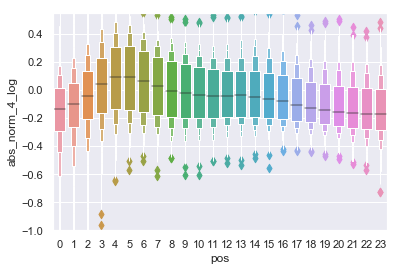

In [869]:
sns.boxenplot(
    x='pos',
    y='abs_norm_4_log',
    data=ds1['abs_norm_4_log'].to_dataframe().reset_index()
)
ax = plt.gca()
ax.set_ylim(-1, .55)

(0, 0.55)

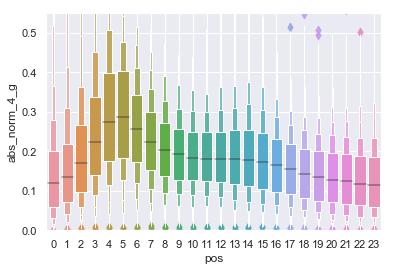

In [873]:
sns.boxenplot(
    x='pos',
    y='abs_norm_4_g',
    data=ds1['abs_norm_4_g'].to_dataframe().reset_index()
)
ax = plt.gca()
ax.set_ylim(0, .55)

(-1, 0.55)

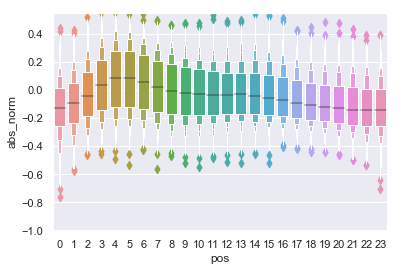

In [706]:
sns.boxenplot(
    x='pos',
    y='abs_norm',
    data=ds1['abs_norm'].to_dataframe().reset_index()
)
ax = plt.gca()
ax.set_ylim(-1, .55)

In [713]:
ds1['abs670_g'].isel(pos=slice(4,200))

<xarray.DataArray 'abs670_g' (day: 1813, pos: 20)>
array([[0.204674, 0.24863 , 0.265732, ..., 0.049105, 0.061844, 0.094713],
       [0.101573, 0.106123, 0.152726, ..., 0.096897, 0.066612, 0.044195],
       [0.906113, 0.720878, 0.416357, ..., 0.062785, 0.070865, 0.079145],
       ...,
       [4.512471, 2.993277, 2.141008, ..., 0.230564, 0.158489, 0.119772],
       [0.721778, 0.860917, 0.780879, ..., 0.143558, 0.1477  , 0.172855],
       [0.656377, 1.182634, 1.695049, ..., 0.12758 , 0.122079, 0.150062]])
Coordinates:
  * day      (day) datetime64[ns] 2012-01-02 2012-01-08 ... 2018-12-31
  * pos      (pos) int64 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23

In [714]:
from sklearn.cluster import KMeans

In [922]:
ucp.cl

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [953]:
from sklearn.metrics import silhouette_score
sc = []
for nc in range(2,20):
    X=ds1['abs_norm_4_g'].isel(pos=slice(4,200))
    kmeans = KMeans(n_clusters=nc, random_state=np.random.randint(0,1000)).fit(X)
    score = silhouette_score(X,kmeans.labels_)
    sc.append([nc,score])

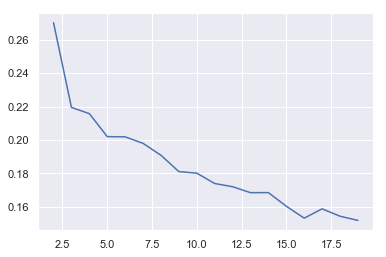

In [954]:
plt.plot(*np.array(sc).T)

In [963]:
nc = 4
X=ds1['abs_norm_4_g'].isel(pos=slice(4,200))
kmeans = KMeans(n_clusters=nc, random_state=np.random.randint(0,1000)).fit(X)
score = silhouette_score(X,kmeans.labels_)
sc.append([nc,score])

In [964]:
silhouette_score(X,kmeans.labels_)

0.2157441248622302

<BarContainer object of 4 artists>

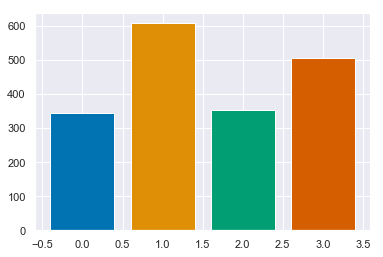

In [965]:
labs = kmeans.labels_
un = np.unique(labs,return_counts=True)
plt.bar(*un,color=ucp.cl)

In [966]:
ds1['lab']=('day',kmeans.labels_)

In [967]:
def pl_nc(nc,ax, lab='s',par='abs_norm_4_g',yr=(-.5,.5),col='k'):
    dd=ds1.where(ds1.lab==nc)
    dd=dd[par].dropna(dim='day')
    dd=dd.to_dataframe().reset_index()
    sns.boxenplot(x='pos',y=par,data=dd,ax=ax,color=col)
#     ax = plt.gca()
    ax.set_ylim(*yr)
    ax.set_title(i)

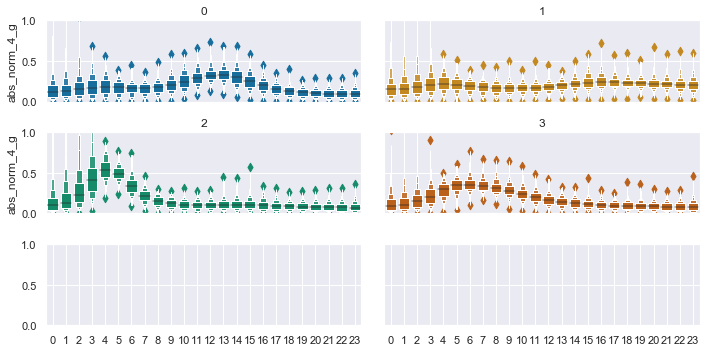

In [968]:
fig,axs=plt.subplots(3,2,sharex=True,sharey=True,figsize=(10,5))
axl = np.ndarray.flatten(axs)

for i in range(nc):
#     print(i)
#     fig,ax=plt.subplots()
    pl_nc(i,axl[i],lab=i,yr=(0,1),col=ucp.cl[i])
for a in np.ndarray.flatten(axs[:,-1:]): a.set_ylabel('')
for a in np.ndarray.flatten(axs[:-1,:]): a.set_xlabel('')

fig.tight_layout()

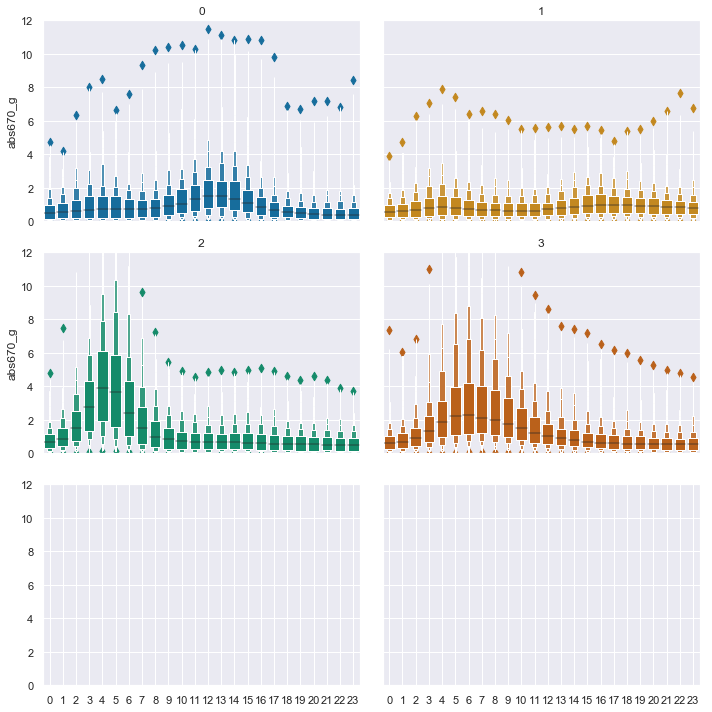

In [969]:
fig,axs=plt.subplots(3,2,sharex=True,sharey=True,figsize=(10,10))
axl = np.ndarray.flatten(axs)

for i in range(nc):
#     print(i)
#     fig,ax=plt.subplots()
    pl_nc(i,axl[i],lab=i,par = 'abs670_g',yr=(0,12),col=ucp.cl[i])
for a in np.ndarray.flatten(axs[:,-1:]): a.set_ylabel('')
for a in np.ndarray.flatten(axs[:-1,:]): a.set_xlabel('')

fig.tight_layout()

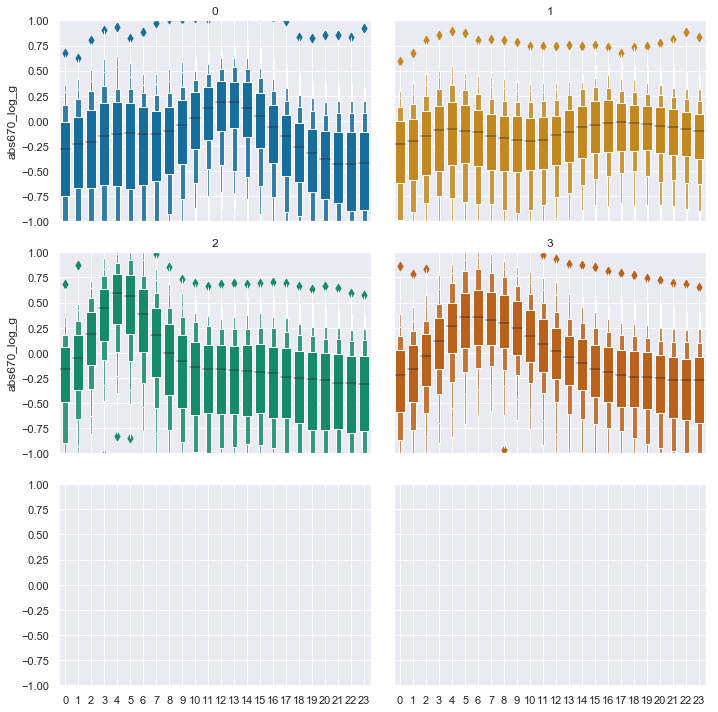

In [970]:
fig,axs=plt.subplots(3,2,sharex=True,sharey=True,figsize=(10,10))
axl = np.ndarray.flatten(axs)

for i in range(nc):
#     print(i)
#     fig,ax=plt.subplots()
    pl_nc(i,axl[i],lab=i,par = 'abs670_log_g',yr=(-1,1),col=ucp.cl[i])
for a in np.ndarray.flatten(axs[:,-1:]): a.set_ylabel('')
for a in np.ndarray.flatten(axs[:-1,:]): a.set_xlabel('')

fig.tight_layout()

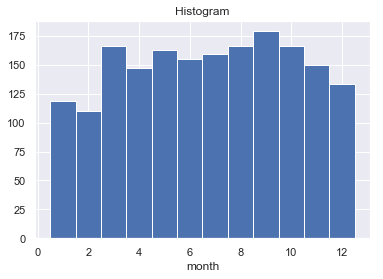

In [1031]:
va = ds1.where(True).month[:,1]
va = va.dropna('day')
va.plot.hist(bins = np.arange(.5,13,1))
tot_days = pd.DataFrame(*np.flip(np.unique(va,return_counts=True),axis=0))

In [1058]:
def pl_his(ds1,lab,ax,col,tot):
    va = ds1.where(ds1.lab==lab).month[:,1]
    va = va.dropna('day')
    va = pd.DataFrame(*np.flip(np.unique(va,return_counts=True),axis=0))
    va = va / tot
    va = va.reset_index().T.values
#     print(va)
    ax.bar(*va,color = col)
    ax.set_xticks(np.arange(2,12,2));

In [1059]:
cols = 2 
rows = int(np.ceil(nc/cols))

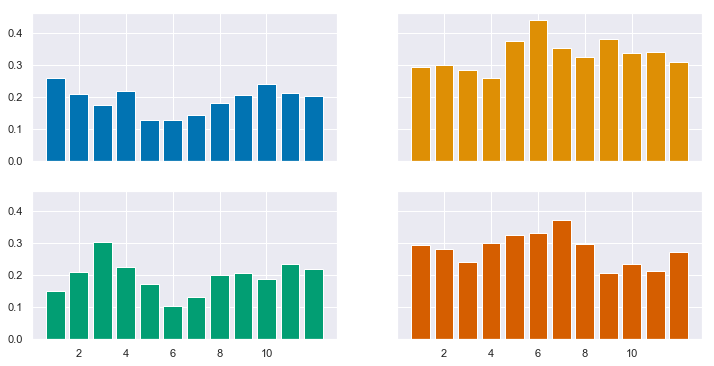

In [1063]:
fig, axs = plt.subplots(rows,cols,sharex=True,sharey=True,figsize=(cols*3*2,rows*3))
axl = np.ndarray.flatten(axs)
for i in range(nc):
    pl_his(ds1,i,axl[i],ucp.cl[i], tot_days)

In [1065]:
ds1

<xarray.Dataset>
Dimensions:         (day: 1813, pos: 24)
Coordinates:
  * day             (day) datetime64[ns] 2012-01-02 2012-01-08 ... 2018-12-31
  * pos             (pos) int64 0 1 2 3 4 5 6 7 8 ... 15 16 17 18 19 20 21 22 23
Data variables:
    year            (day, pos) float64 2.012e+03 2.012e+03 ... 2.018e+03
    month           (day, pos) float64 1.0 1.0 1.0 1.0 ... 12.0 12.0 12.0 12.0
    d               (day, pos) float64 1.0 1.0 1.0 1.0 ... 31.0 31.0 31.0 31.0
    n               (day, pos) float64 24.0 24.0 24.0 24.0 ... 24.0 24.0 24.0
    abs670_log_g    (day, pos) float64 -0.687 -0.7263 ... -0.9134 -0.8237
    hour            (day, pos) float64 12.0 13.0 14.0 15.0 ... 8.0 9.0 10.0 11.0
    abs_norm        (day, pos) float64 -0.1468 -0.1552 ... -0.2212 -0.1995
    tot_norm_4      (day) float64 4.432 4.275 3.776 3.147 ... 2.218 2.483 4.024
    abs_norm_4      (day, pos) float64 -0.155 -0.1639 -0.1834 ... -0.227 -0.2047
    abs670_g        (day, pos) float64 0.2056 0.1878 0

In [1080]:
hour_utc = ds1.hour.median('day').astype(int)
hour_utc.name='hour_utc'
ds1 = ds1.assign_coords(hour_utc=hour_utc)
hour_loc = ds1.hour.median('day').astype(int)-4
hour_loc.name='hour_loc'
ds1=ds1.assign_coords(hour_loc=hour_loc)

In [1081]:
ds1

<xarray.Dataset>
Dimensions:         (day: 1813, pos: 24)
Coordinates:
  * day             (day) datetime64[ns] 2012-01-02 2012-01-08 ... 2018-12-31
  * pos             (pos) int64 0 1 2 3 4 5 6 7 8 ... 15 16 17 18 19 20 21 22 23
    hour_utc        (pos) int64 12 13 14 15 16 17 18 19 20 ... 4 5 6 7 8 9 10 11
    hour_loc        (pos) int64 8 9 10 11 12 13 14 15 16 ... -1 0 1 2 3 4 5 6 7
Data variables:
    year            (day, pos) float64 2.012e+03 2.012e+03 ... 2.018e+03
    month           (day, pos) float64 1.0 1.0 1.0 1.0 ... 12.0 12.0 12.0 12.0
    d               (day, pos) float64 1.0 1.0 1.0 1.0 ... 31.0 31.0 31.0 31.0
    n               (day, pos) float64 24.0 24.0 24.0 24.0 ... 24.0 24.0 24.0
    abs670_log_g    (day, pos) float64 -0.687 -0.7263 ... -0.9134 -0.8237
    hour            (day, pos) float64 12.0 13.0 14.0 15.0 ... 8.0 9.0 10.0 11.0
    abs_norm        (day, pos) float64 -0.1468 -0.1552 ... -0.2212 -0.1995
    tot_norm_4      (day) float64 4.432 4.275 3.776 3.

In [1084]:
path_save = './data/bc_data_v01.h5'
# ds1.to_netcdf(path_save)